<a href="https://colab.research.google.com/github/YuvrajRawat/Cement-Strength-Prediction/blob/main/CementStrengthPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sb

In [4]:
df = pd.read_csv('concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
num= df.select_dtypes(include=['int64','float64']).keys()
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
impute_fit= impute.fit(df[num])
df[num]= impute_fit.transform(df[num])
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


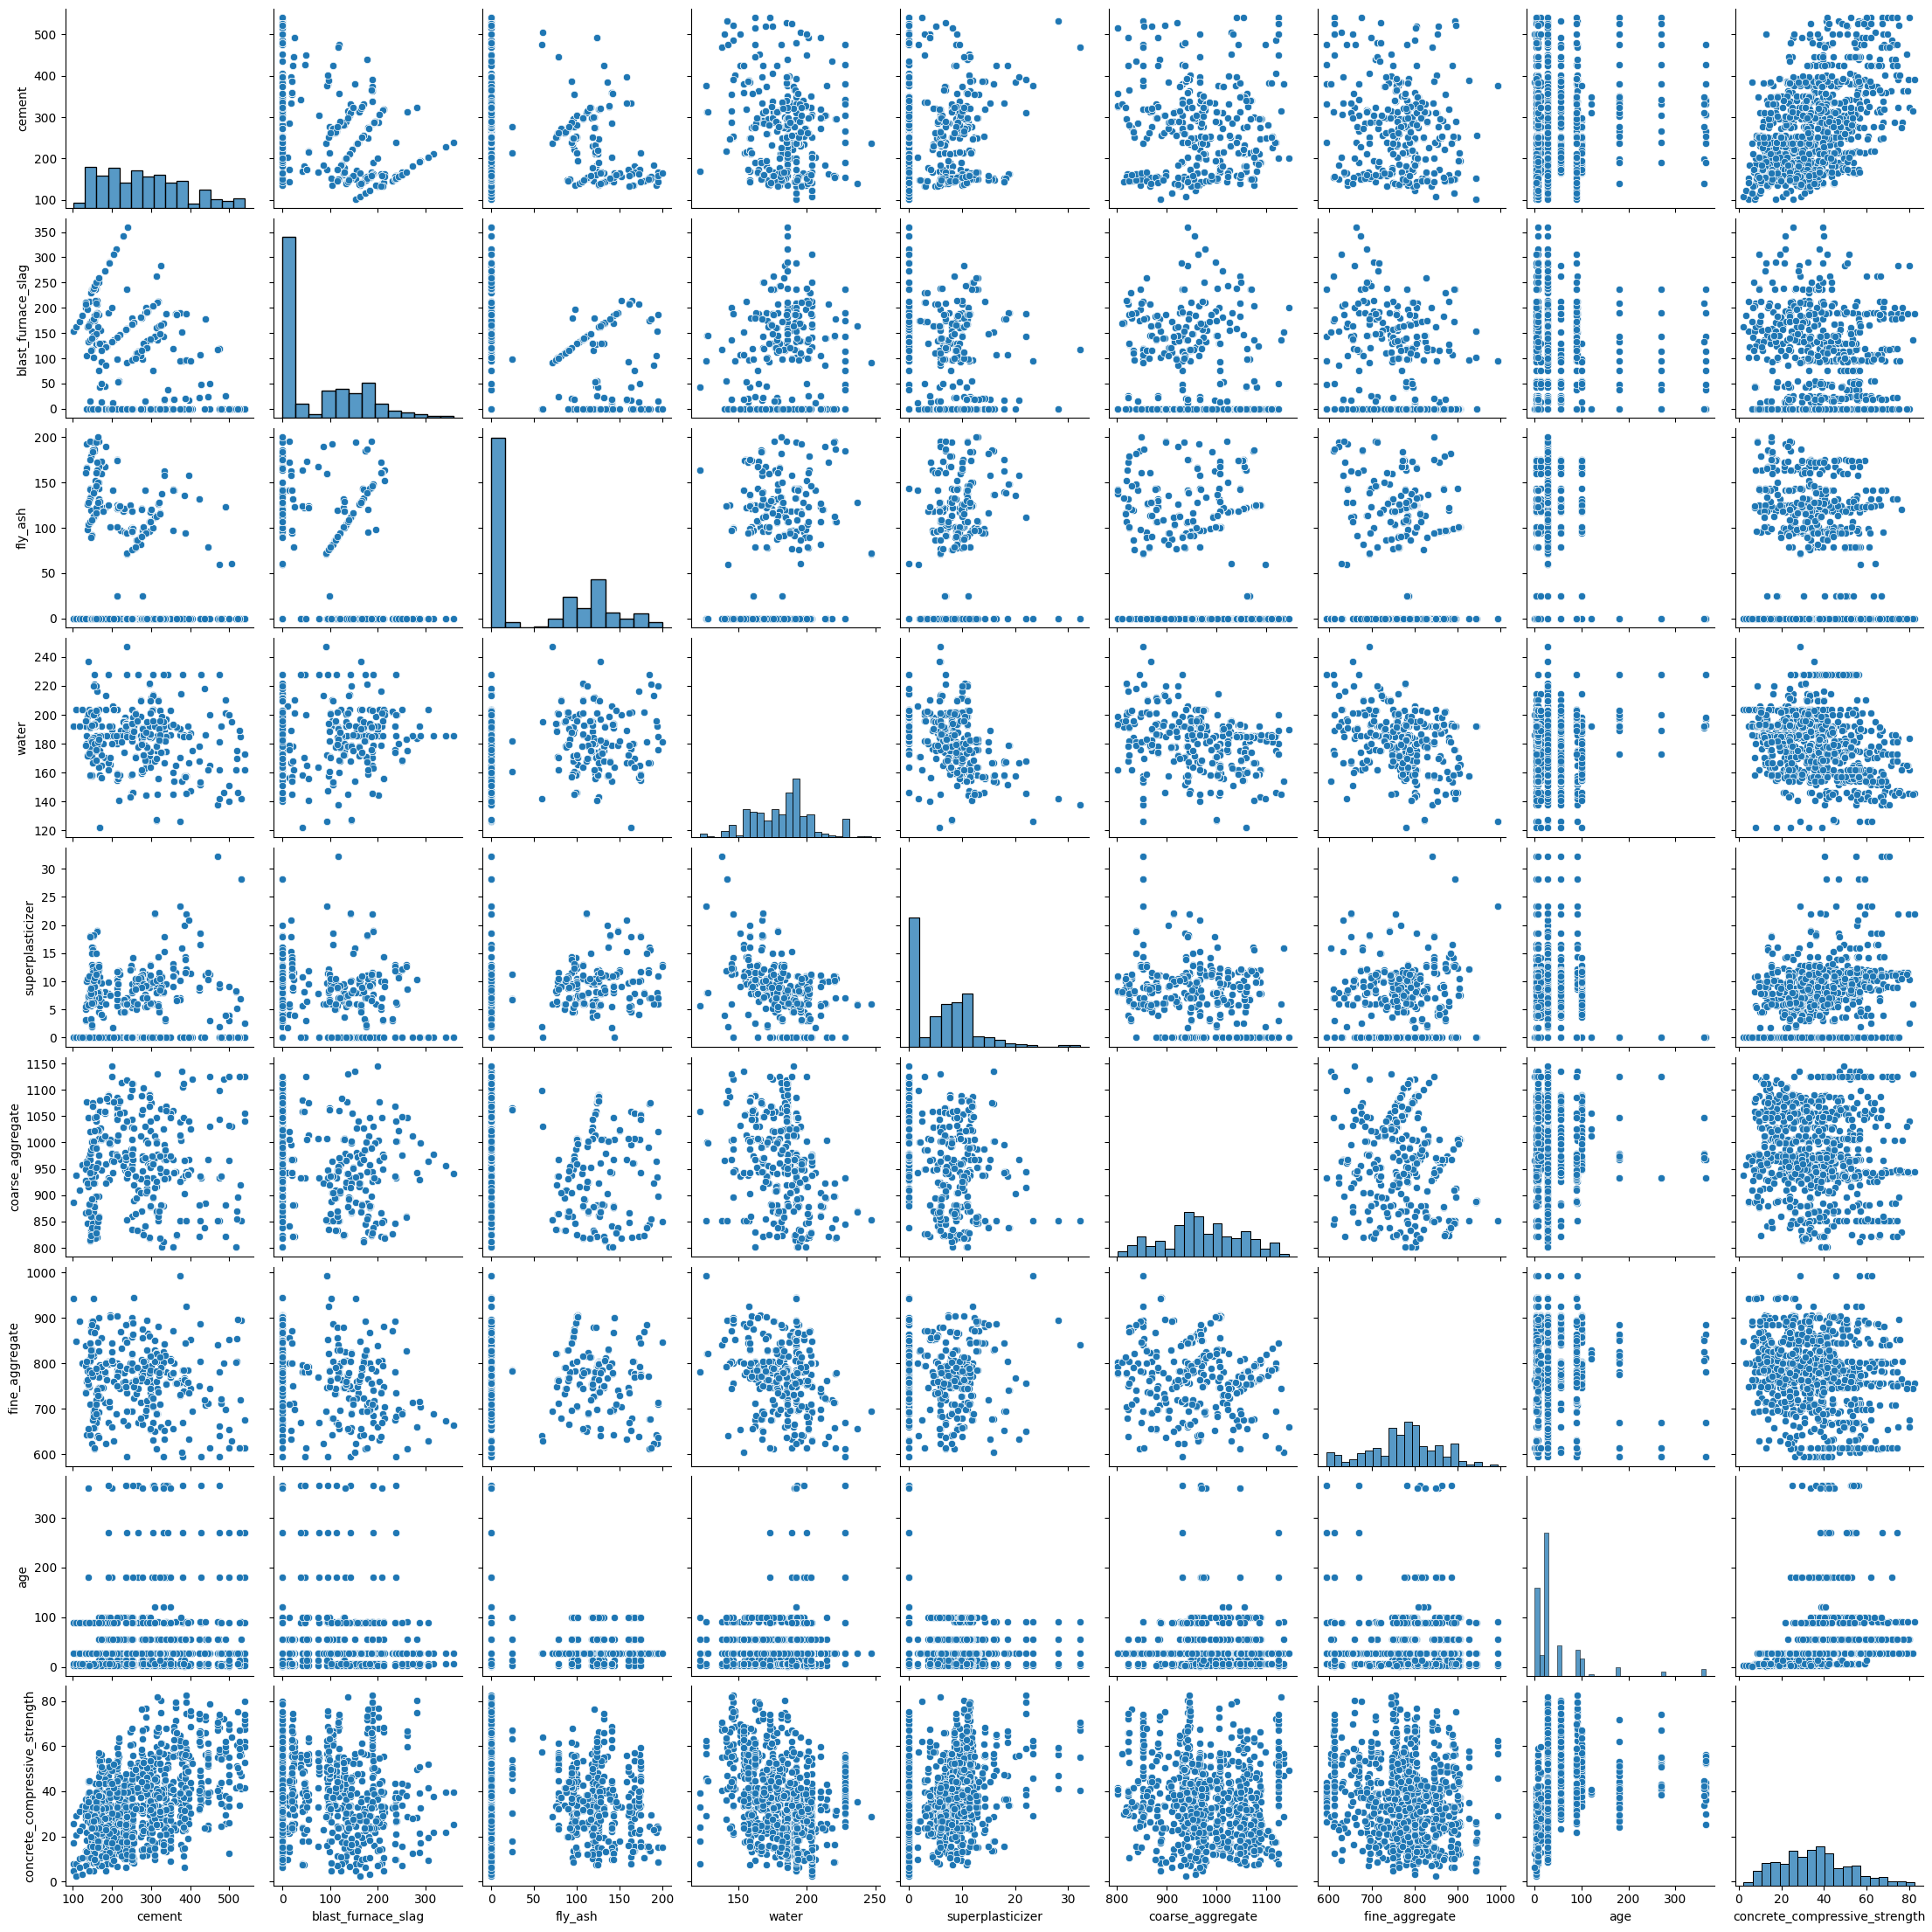

In [9]:
# pairplot of dataframe
sb.pairplot( df )

ValueError: ignored

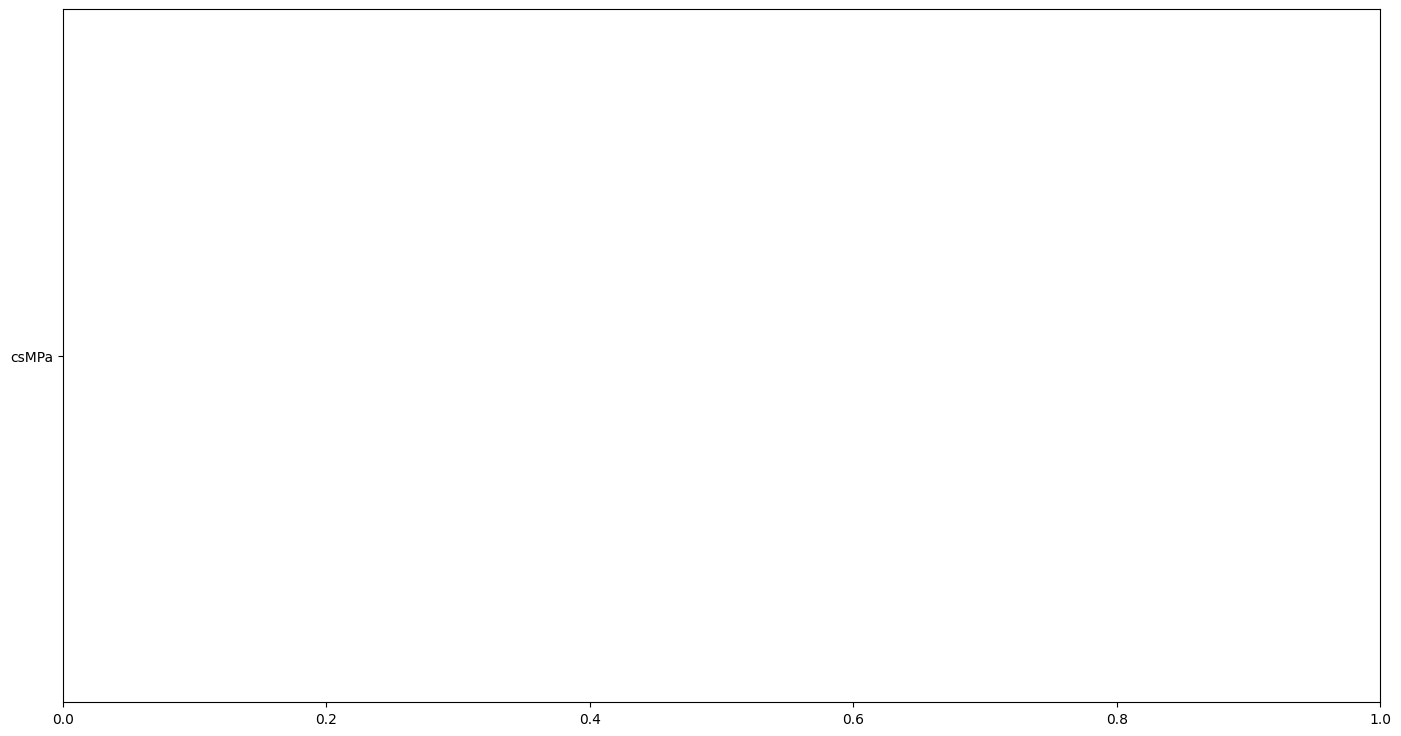

In [10]:
# scatter plot of Water and Cement
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='cement',edgecolors='red',data=df)
plt.ylabel('csMPa')
plt.xlabel('cement')

Text(0.5, 0, 'flyash')

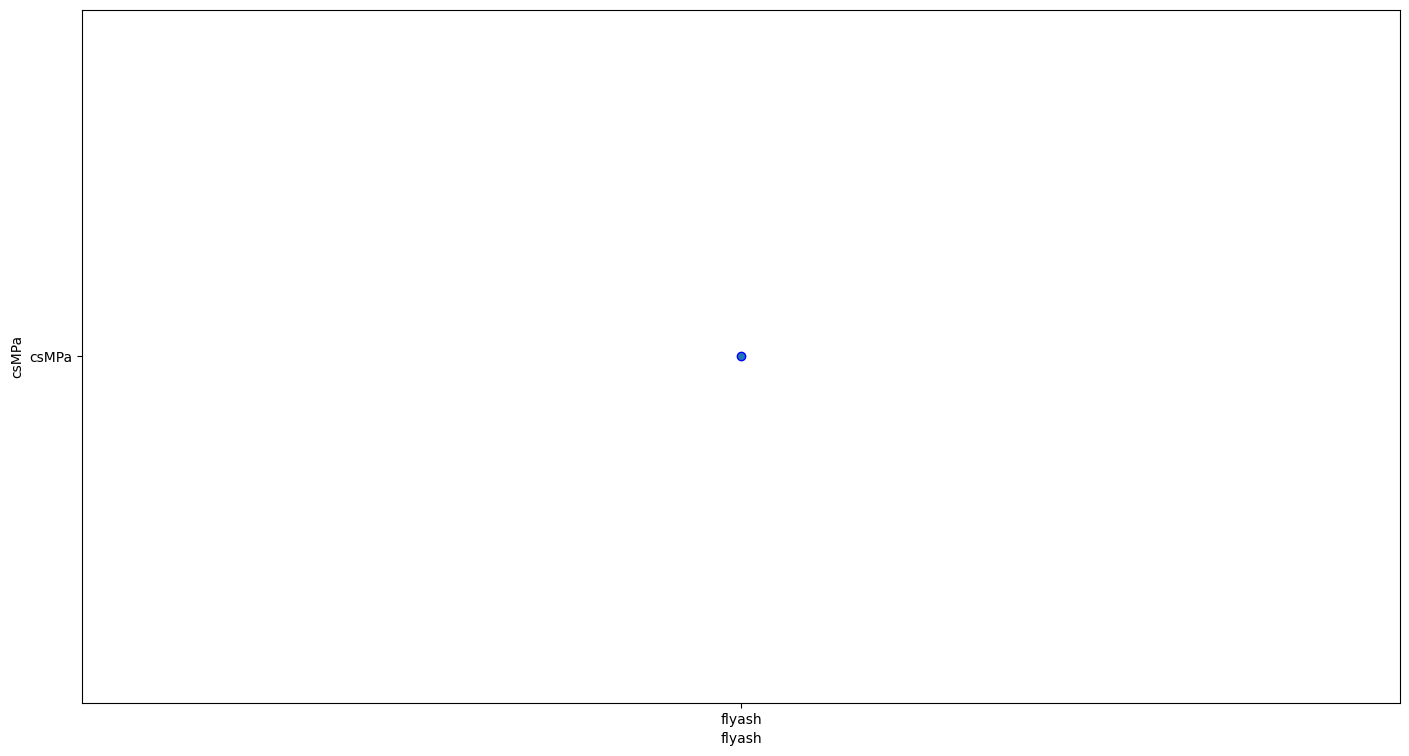

In [12]:
plt.figure(figsize=[17,9])
plt.scatter(y='csMPa',x='flyash',edgecolors='blue',data=df)
plt.ylabel('csMPa')
plt.xlabel('flyash')

<Axes: >

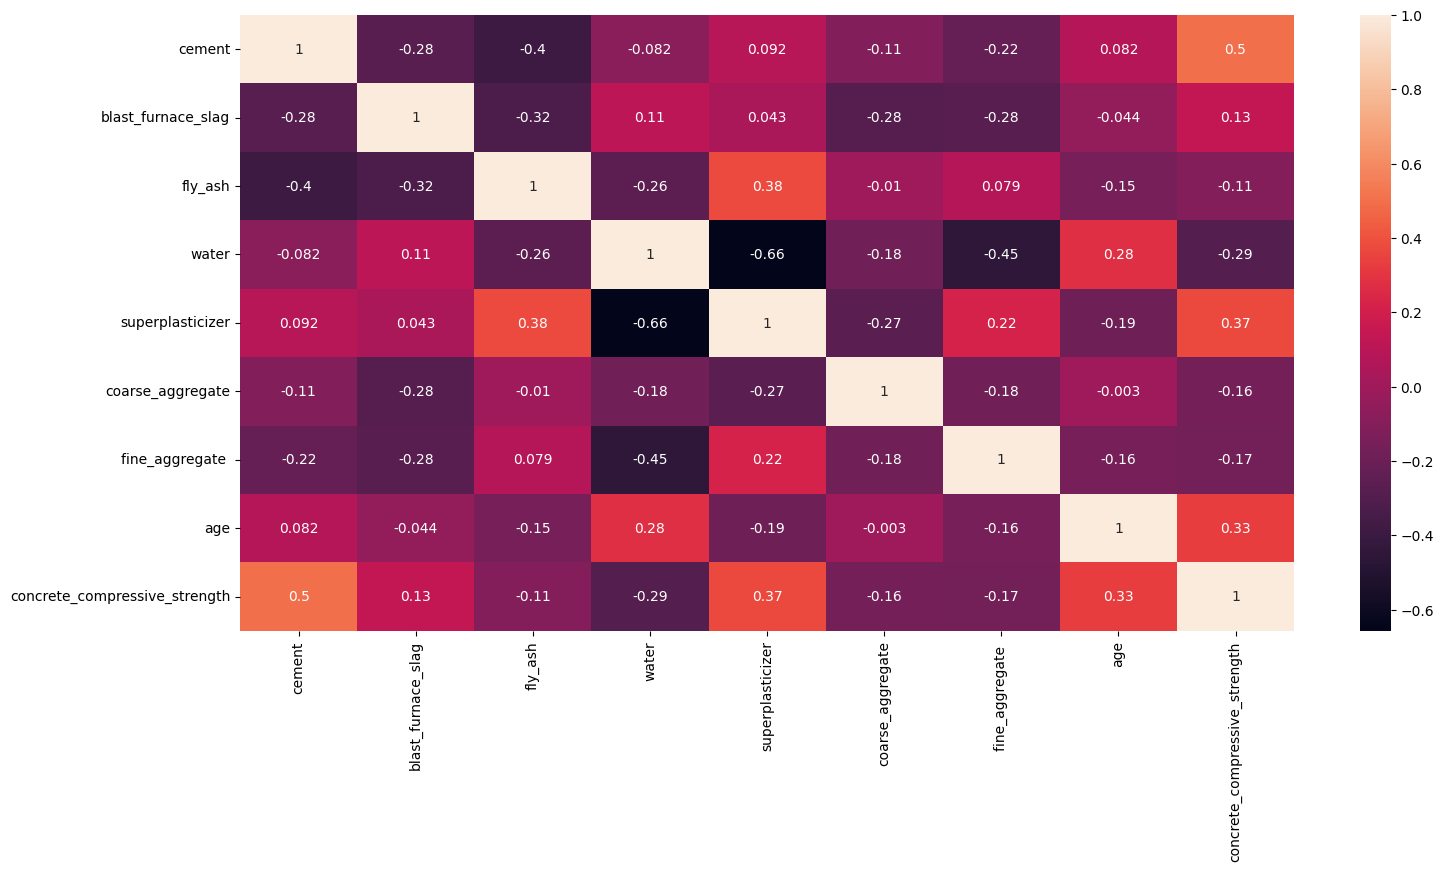

In [11]:
plt.figure(figsize=[17,8])

#ploting correlation plot

sb.heatmap(df.corr(),annot=True)

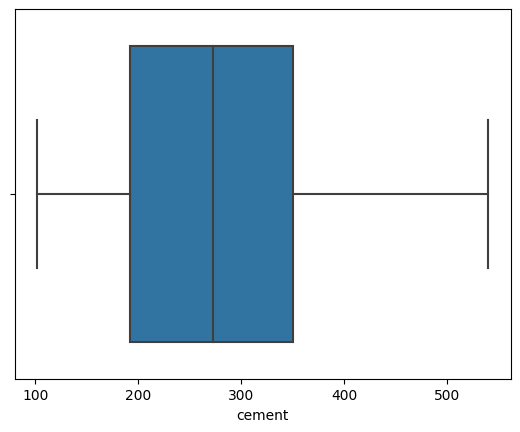

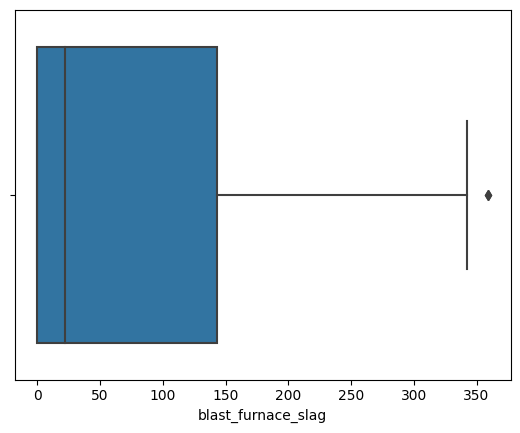

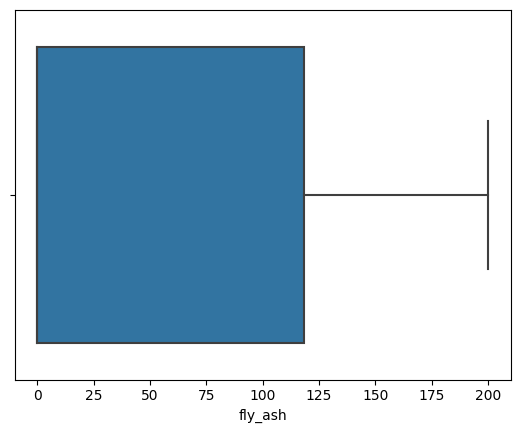

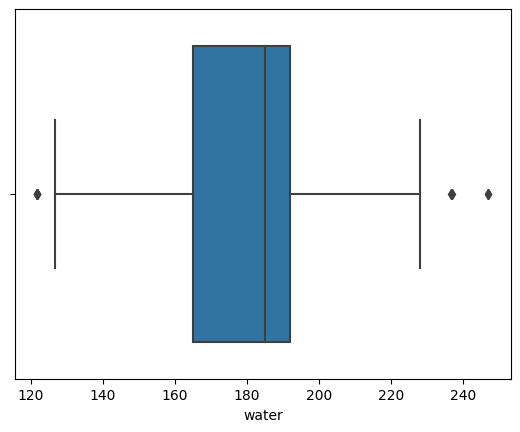

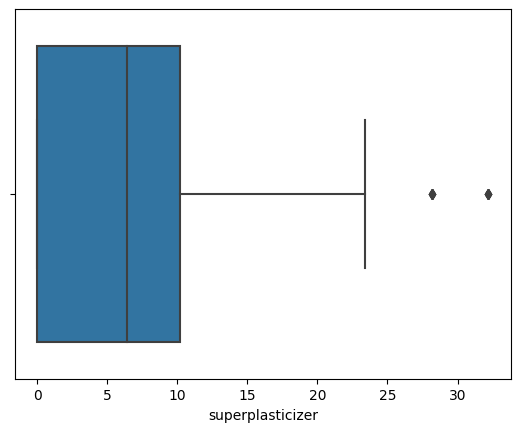

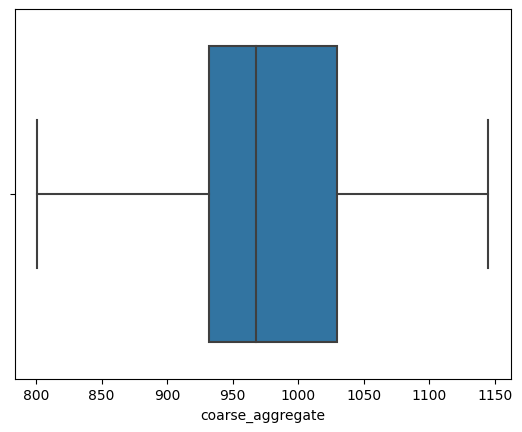

In [21]:
l=['cement', 'blast_furnace_slag',	'fly_ash',	'water',	'superplasticizer',	'coarse_aggregate']
for i in l:
    sb.boxplot(x=df[i])
    plt.show()

In [24]:
# independent variables
x = df.drop(['concrete_compressive_strength'],axis=1)
# dependent variables
y = df['concrete_compressive_strength']

In [25]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [28]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predcted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict))
print('root mean squared error is == {}'.format(rms))

predcted score is : 0.5943782479239208
..................................
mean_sqrd_error is == 109.75080797014397
root mean squared error is == 10.476201982118518


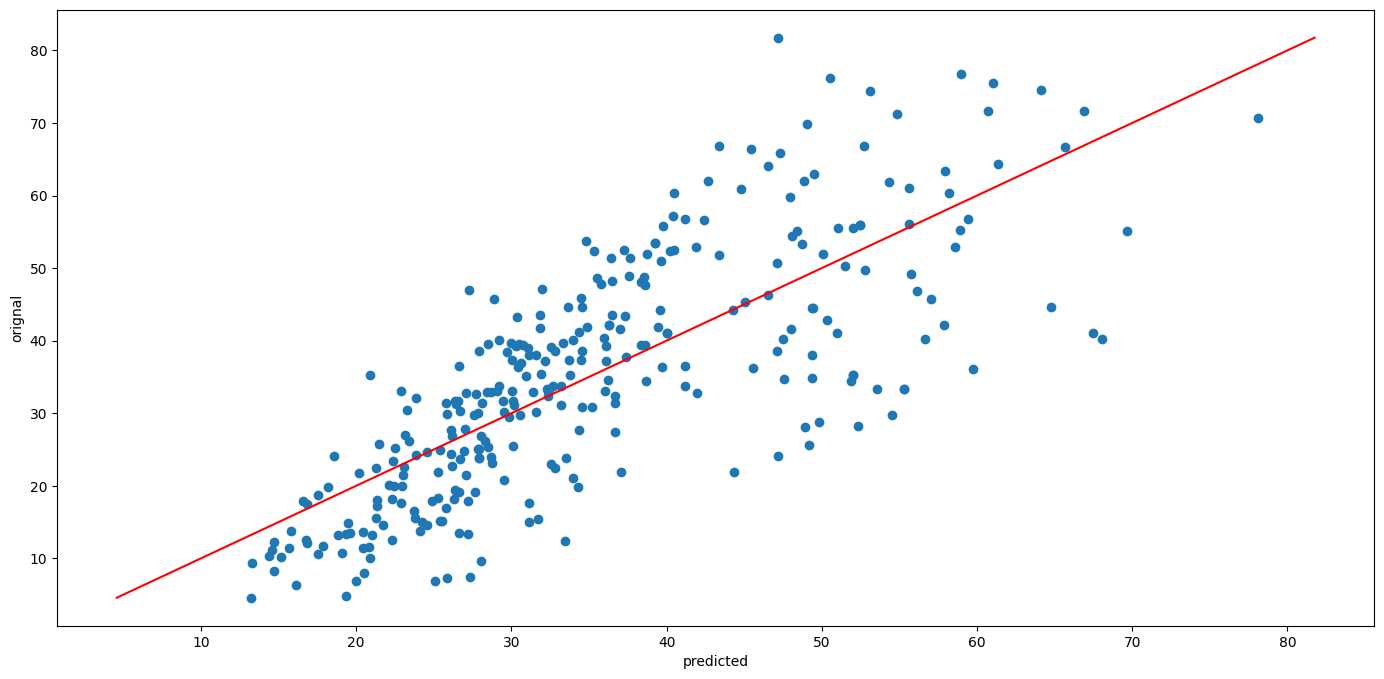

In [29]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [30]:
# import rigd and lasso regresion
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
rd= Ridge(alpha=0.4)
ls= Lasso(alpha=0.3)
fit_rd=rd.fit(xtrain_scl,ytrain)
fit_ls = ls.fit(xtrain_scl,ytrain)
print('score od ridge regression is:-',rd.score(xtest_scl,ytest))
print('.......................................................')
print('score of lasso is:-',ls.score(xtest_scl,ytest))
print('mean_sqrd_roor of ridig is==',mean_squared_error(ytest,rd.predict(xtest_scl)))
print('mean_sqrd_roor of lasso is==',mean_squared_error(ytest,ls.predict(xtest_scl)))
print('root_mean_squared error of ridge is==',np.sqrt(mean_squared_error(ytest,rd.predict(xtest_scl))))
print('root_mean_squared error of lasso is==',np.sqrt(mean_squared_error(ytest,lr.predict(xtest_scl))))

score od ridge regression is:- 0.5946771295476782
.......................................................
score of lasso is:- 0.5892480040172353
mean_sqrd_roor of ridig is== 109.66993829408021
mean_sqrd_roor of lasso is== 111.13891995122191
root_mean_squared error of ridge is== 10.472341586010275
root_mean_squared error of lasso is== 10.476201982118518


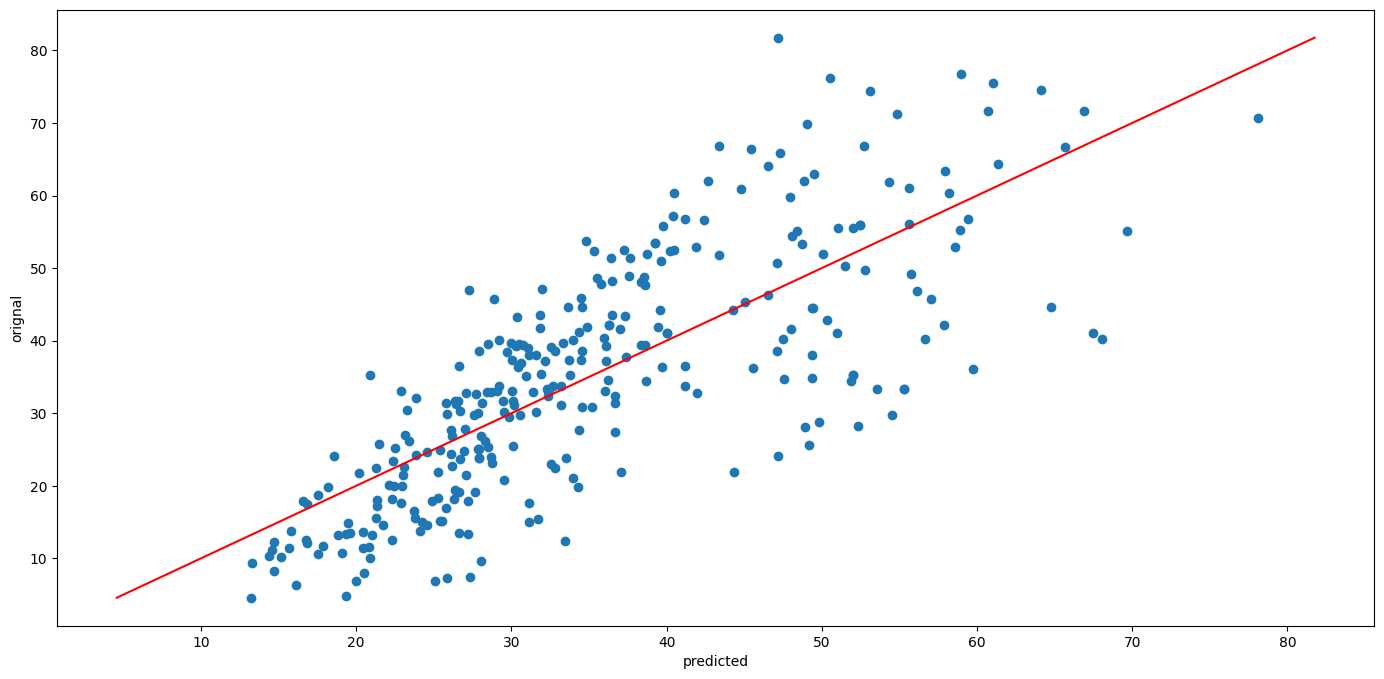

In [31]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

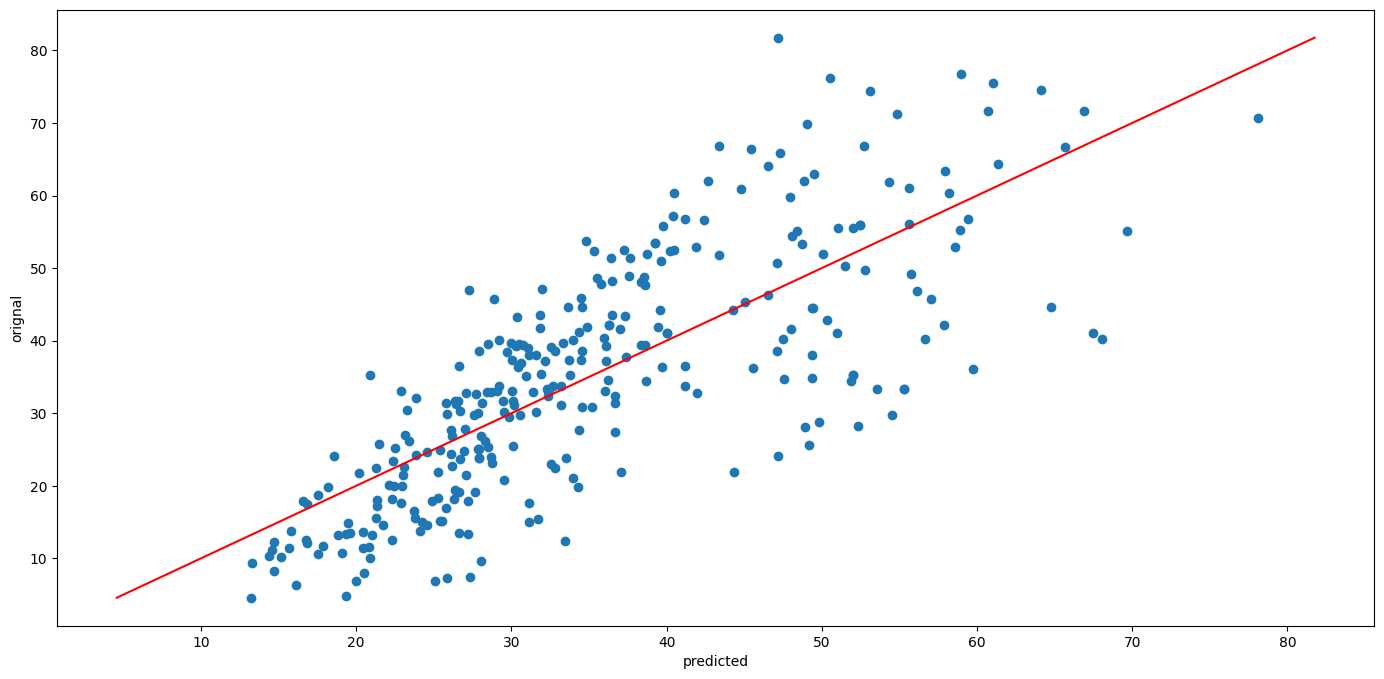

In [32]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [33]:
# import random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rnd= RandomForestRegressor(ccp_alpha=0.0)
fit_rnd= rnd.fit(xtrain_scl,ytrain)
print('score is:-',rnd.score(xtest_scl,ytest))
print('........................................')
print('mean_sqrd_error is==',mean_squared_error(ytest,rnd.predict(xtest_scl)))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(ytest,rnd.predict(xtest_scl))))

score is:- 0.8905168519825277
........................................
mean_sqrd_error is== 29.623322448887635
root_mean_squared error of is== 5.442731157138632


In [34]:
x_predict = list(rnd.predict(xtest))
predicted_df = {'predicted_values': x_predict, 'original_values': ytest}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,predicted_values,original_values
31,57.3362,52.91
109,63.4001,55.90
136,63.4001,74.50
88,63.3441,35.30
918,56.4116,10.54
1025,63.6250,44.28
870,63.6250,23.69
318,56.4116,45.37
261,56.4116,37.40
535,53.9071,48.85


In [35]:
import pickle
file = 'concrete_strength'
save = pickle.dump(rnd,open(file,'wb'))